# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from pprint import pprint 

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
##testing code for Sitka 
url = 'https://api.openweathermap.org/data/2.5/weather?'
city_url = f"{url}appid={weather_api_key}&q="
city_weather = requests.get(city_url+'sitka').json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 57.0531, 'lon': -135.33},
 'dt': 1682086055,
 'id': 5557293,
 'main': {'feels_like': 282.69,
          'humidity': 43,
          'pressure': 1021,
          'temp': 283.09,
          'temp_max': 283.09,
          'temp_min': 283.09},
 'name': 'Sitka',
 'sys': {'country': 'US',
         'id': 7795,
         'sunrise': 1682084245,
         'sunset': 1682137335,
         'type': 1},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 1.54}}


In [6]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | furukawa
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | kapuskasing
Processing Record 9 of Set 1 | urangan
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | booneville
Processing Record 14 of Set 1 | horta
Processing Record 15 of Set 1 | malango
Processing Record 16 of Set 1 | shingu
Processing Record 17 of Set 1 | arteche
Processing Record 18 of Set 1 | iaciara
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | serenje
Processing Record 22 of S

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,283.21,92,23,2.36,NZ,1682086814
1,punta arenas,-53.1500,-70.9167,279.21,70,75,9.26,CL,1682086814
2,furukawa,38.5717,140.9556,280.72,57,100,5.17,JP,1682086815
3,grytviken,-54.2811,-36.5092,275.53,81,12,3.70,GS,1682086815
4,puerto natales,-51.7236,-72.4875,280.40,45,20,4.63,CL,1682086628


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,283.21,92,23,2.36,NZ,1682086814
1,punta arenas,-53.1500,-70.9167,279.21,70,75,9.26,CL,1682086814
2,furukawa,38.5717,140.9556,280.72,57,100,5.17,JP,1682086815
3,grytviken,-54.2811,-36.5092,275.53,81,12,3.70,GS,1682086815
4,puerto natales,-51.7236,-72.4875,280.40,45,20,4.63,CL,1682086628


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [16]:
lat = city_data_df['Lat']
long = city_data_df['Lng']
lat

City_ID
0     -46.5619
1     -53.1500
2      38.5717
3     -54.2811
4     -51.7236
        ...   
575    30.2500
576    41.9908
577    22.8333
578     6.3005
579    35.3089
Name: Lat, Length: 580, dtype: float64

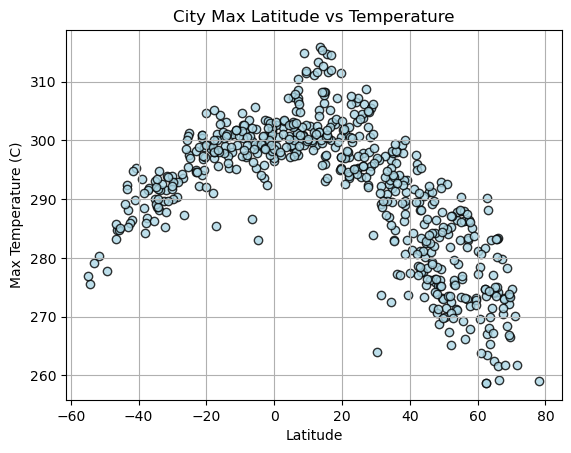

In [19]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat, temp, color="lightblue", alpha = 0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

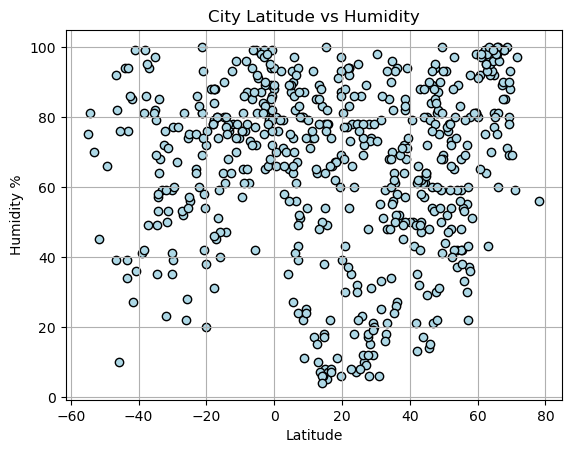

In [21]:
# Build the scatter plots for latitude vs. humidity
humid = temp = city_data_df['Humidity']
plt.scatter(lat, humid, color="lightblue", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

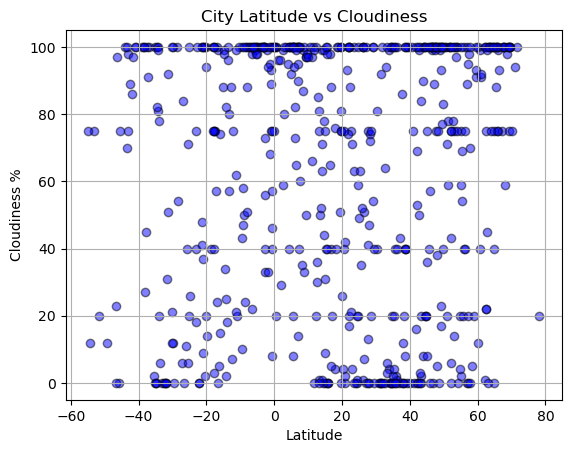

In [22]:
# Build the scatter plots for latitude vs. cloudiness
cloud = temp = city_data_df['Cloudiness']
plt.scatter(lat,cloud, color="blue", alpha = 0.5, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

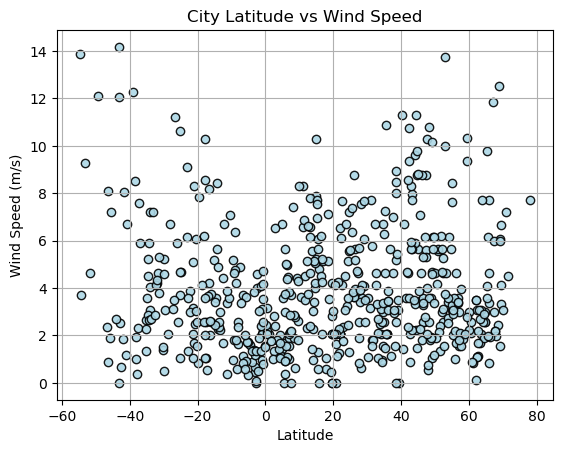

In [23]:
# Build the scatter plots for latitude vs. wind speed
speed = city_data_df['Wind Speed']
plt.scatter(lat,speed, color="lightblue", alpha = 0.9, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
from scipy import stats

City_ID
0      64.906750
1      64.834733
2      65.837371
3      64.822369
4      64.850326
         ...    
575    65.746404
576    65.874746
577    65.665330
578    65.484605
579    65.801704
Name: Lat, Length: 580, dtype: float64


Text(40, 10, 'y = 0.01 x + 65.42')

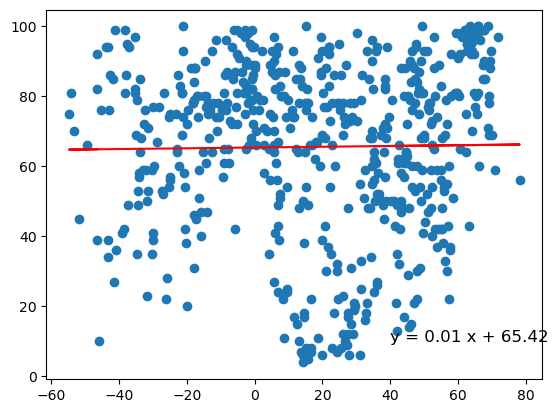

In [35]:
# Define a function to create Linear Regression plots
x = city_data_df['Lat']
y = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Get regression values
regress_values = x*slope + intercept
print(regress_values)
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (40,10), fontsize = 12, color = 'black')
#plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"]>= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,furukawa,38.5717,140.9556,280.72,57,100,5.17,JP,1682086815
6,kapuskasing,49.4169,-82.4331,273.20,100,100,6.17,CA,1682086817
8,yellowknife,62.4560,-114.3525,273.44,64,75,3.09,CA,1682086818
10,petropavlovsk-kamchatsky,53.0452,158.6483,275.48,65,75,10.00,RU,1682086819
11,booneville,34.6582,-88.5667,291.94,96,100,2.98,US,1682086819


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df["Lat"]<= 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,283.21,92,23,2.36,NZ,1682086814
1,punta arenas,-53.1500,-70.9167,279.21,70,75,9.26,CL,1682086814
3,grytviken,-54.2811,-36.5092,275.53,81,12,3.70,GS,1682086815
4,puerto natales,-51.7236,-72.4875,280.40,45,20,4.63,CL,1682086628
5,port-aux-francais,-49.3500,70.2167,277.79,66,12,12.10,TF,1682086816


###  Temperature vs. Latitude Linear Regression Plot

City_ID
0      334.955299
1      338.602616
2      287.823471
3      339.228818
4      337.812930
          ...    
575    292.430547
576    285.930582
577    296.536594
578    305.689515
579    289.629829
Name: Lat, Length: 580, dtype: float64


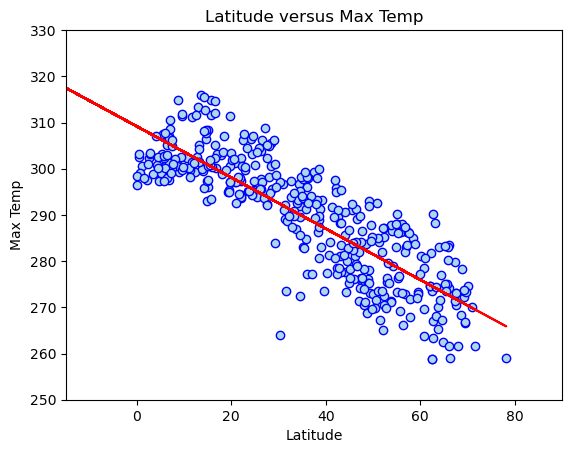

In [41]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim(-15, 90)
plt.ylim(250, 330)
plt.title("Latitude versus Max Temp")

# Get regression values
regress_values = x*slope + intercept
print(regress_values)
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (5,-10), fontsize = 12, color = 'red')
plt.show()

City_ID
0      286.936074
1      284.773508
2      314.881461
3      284.402221
4      285.241728
          ...    
575    312.149836
576    316.003792
577    309.715279
578    304.288332
579    313.810436
Name: Lat, Length: 580, dtype: float64


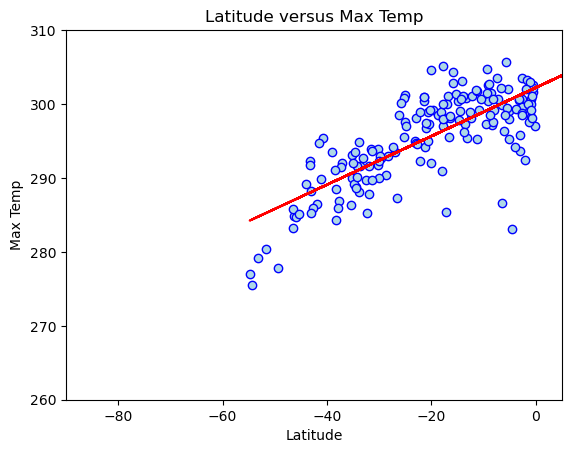

In [47]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.xlim(-90, 5)
plt.ylim(260, 310)
plt.title("Latitude versus Max Temp")

# Get regression values
regress_values = x*slope + intercept
print(regress_values)
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (5,-10), fontsize = 12, color = 'red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r squared value is 0.04732955115014143


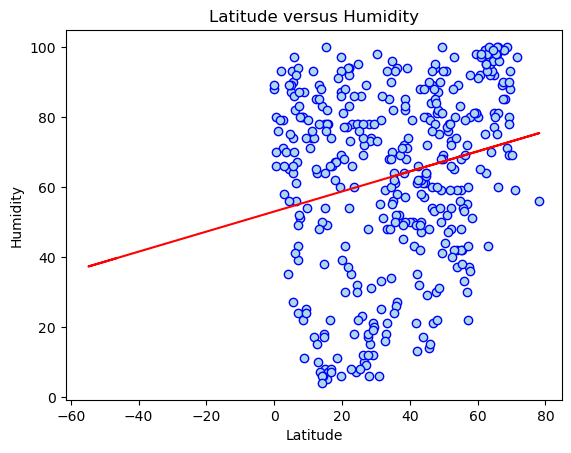

In [52]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
#plt.xlim(-15, 90)
#plt.ylim(250, 330)
plt.title("Latitude versus Humidity")

# Get regression values
regress_values = x*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"The r squared value is {rvalue **2}")
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (5,-10), fontsize = 12, color = 'red')
plt.show()

The r squared value is 0.11218696344649434


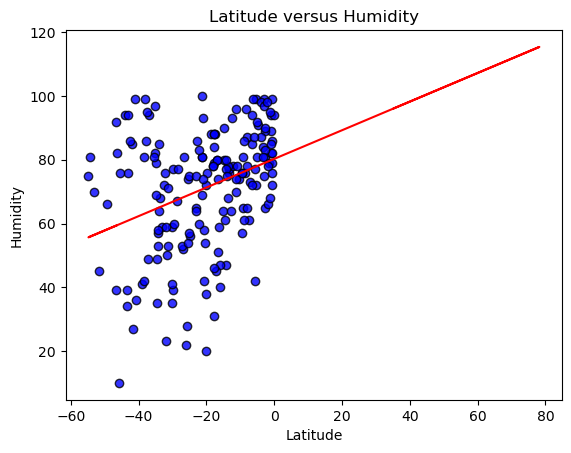

In [53]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'blue', alpha = 0.8, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude versus Humidity")

# Get regression values
regress_values = x*slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"The r squared value is {rvalue **2}")
plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (5,-10), fontsize = 12, color = 'red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r squared value is 0.0027895792092734813


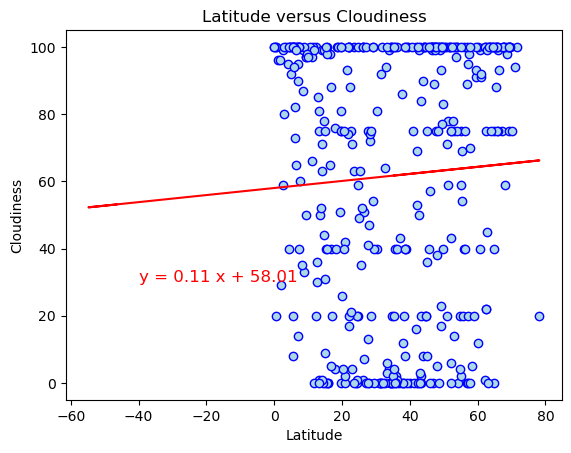

In [55]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude versus Cloudiness")

# Get regression values
regress_values = x*slope + intercept
print(f"The r squared value is {rvalue **2}")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (-40,30), fontsize = 12, color = 'red')
plt.show()

The r squared value is 0.04419571030078722


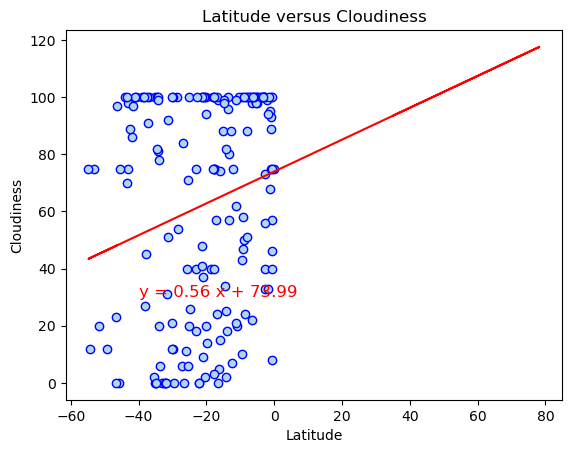

In [56]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude versus Cloudiness")

# Get regression values
regress_values = x*slope + intercept
print(f"The r squared value is {rvalue **2}")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (-40,30), fontsize = 12, color = 'red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r squared value is 0.013126442888246909


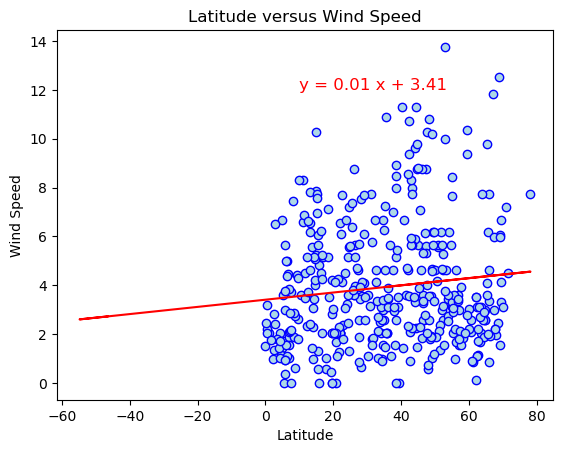

In [57]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude versus Wind Speed")

# Get regression values
regress_values = x*slope + intercept
print(f"The r squared value is {rvalue **2}")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (10,12), fontsize = 12, color = 'red')
plt.show()

The r squared value is 0.14454878746802927


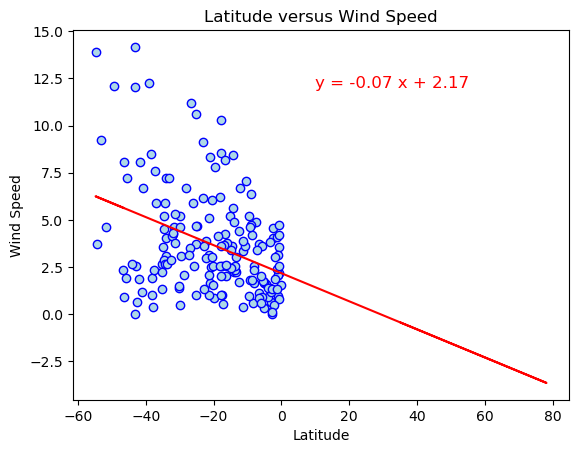

In [58]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)

plt.scatter(x_val, y_val, color= 'lightblue', edgecolors='blue')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude versus Wind Speed")

# Get regression values
regress_values = x*slope + intercept
print(f"The r squared value is {rvalue **2}")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(x, regress_values, 'r-')
plt.annotate(line_eq, (10,12), fontsize = 12, color = 'red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE